In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Kmeans

In [ ]:
data = pd.read_csv('car_insurance.csv')
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [ ]:
data.drop(['ID', 'BIRTH'] , axis=1, inplace=True)
data.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10302 non-null  int64  
 1   AGE         10295 non-null  float64
 2   HOMEKIDS    10302 non-null  int64  
 3   YOJ         9754 non-null   float64
 4   INCOME      9732 non-null   object 
 5   PARENT1     10302 non-null  object 
 6   HOME_VAL    9727 non-null   object 
 7   MSTATUS     10302 non-null  object 
 8   GENDER      10302 non-null  object 
 9   EDUCATION   10302 non-null  object 
 10  OCCUPATION  9637 non-null   object 
 11  TRAVTIME    10302 non-null  int64  
 12  CAR_USE     10302 non-null  object 
 13  BLUEBOOK    10302 non-null  object 
 14  TIF         10302 non-null  int64  
 15  CAR_TYPE    10302 non-null  object 
 16  RED_CAR     10302 non-null  object 
 17  OLDCLAIM    10302 non-null  object 
 18  CLM_FREQ    10302 non-null  int64  
 19  REVOKED     10302 non-nul

In [ ]:
#Dollar columns convert to numeric values
for i in range(len(data)):
  if(data['INCOME'][i] is not np.nan):
    data['INCOME'][i] = data['INCOME'][i].replace('$', '').replace(',', '')

  if(data['HOME_VAL'][i] is not np.nan):
    data['HOME_VAL'][i] = data['HOME_VAL'][i].replace('$', '').replace(',', '')

  if(data['BLUEBOOK'][i] is not np.nan):
    data['BLUEBOOK'][i] = data['BLUEBOOK'][i].replace('$', '').replace(',', '')

  if(data['OLDCLAIM'][i] is not np.nan):
    data['OLDCLAIM'][i] = data['OLDCLAIM'][i].replace('$', '').replace(',', '')

  if(data['CLM_AMT'][i] is not np.nan):
    data['CLM_AMT'][i] = data['CLM_AMT'][i].replace('$', '').replace(',', '')


data['INCOME'] = data['INCOME'].astype(float)
data['HOME_VAL'] = data['HOME_VAL'].astype(float)
data['BLUEBOOK'] = data['BLUEBOOK'].astype(float)
data['OLDCLAIM'] = data['OLDCLAIM'].astype(float)
data['CLM_AMT'] = data['CLM_AMT'].astype(float)

In [ ]:
#Categorical columns convert to numeric values
label_encoder = LabelEncoder()

data.PARENT1 = label_encoder.fit_transform(data.PARENT1)
data.MSTATUS = label_encoder.fit_transform(data.MSTATUS)
data.GENDER = label_encoder.fit_transform(data.GENDER)
data.EDUCATION = label_encoder.fit_transform(data.EDUCATION)
data.OCCUPATION = label_encoder.fit_transform(data.OCCUPATION)
data.CAR_USE = label_encoder.fit_transform(data.CAR_USE)
data.CAR_TYPE = label_encoder.fit_transform(data.CAR_TYPE)
data.RED_CAR = label_encoder.fit_transform(data.RED_CAR)
data.REVOKED = label_encoder.fit_transform(data.REVOKED)
data.URBANICITY = label_encoder.fit_transform(data.URBANICITY)

data.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,0,0.0,1,0,3,...,0,1,4461.0,2,0,3,0.0,18.0,0,0
1,0,43.0,0,11.0,91449.0,0,257252.0,1,0,4,...,0,1,0.0,0,0,0,0.0,1.0,0,0
2,0,48.0,0,11.0,52881.0,0,0.0,1,0,1,...,4,1,0.0,0,0,2,0.0,10.0,0,0
3,0,35.0,1,10.0,16039.0,0,124191.0,0,1,4,...,5,0,38690.0,2,0,3,0.0,10.0,0,0
4,0,51.0,0,14.0,NaN,0,306251.0,0,0,0,...,0,1,0.0,0,0,0,0.0,6.0,0,0


In [ ]:
#Deal to NAN values
imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
imputer.fit_transform(data)
data.iloc[:, :] = imputer.transform(data.iloc[:, :])
data.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0.0,60.0,0.0,11.0,67349.000000,0.0,0.0,1.0,0.0,3.0,...,0.0,1.0,4461.0,2.0,0.0,3.0,0.0,18.0,0.0,0.0
1,0.0,43.0,0.0,11.0,91449.000000,0.0,257252.0,1.0,0.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,48.0,0.0,11.0,52881.000000,0.0,0.0,1.0,0.0,1.0,...,4.0,1.0,0.0,0.0,0.0,2.0,0.0,10.0,0.0,0.0
3,0.0,35.0,1.0,10.0,16039.000000,0.0,124191.0,0.0,1.0,4.0,...,5.0,0.0,38690.0,2.0,0.0,3.0,0.0,10.0,0.0,0.0
4,0.0,51.0,0.0,14.0,61572.073263,0.0,306251.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10302 non-null  float64
 1   AGE         10302 non-null  float64
 2   HOMEKIDS    10302 non-null  float64
 3   YOJ         10302 non-null  float64
 4   INCOME      10302 non-null  float64
 5   PARENT1     10302 non-null  float64
 6   HOME_VAL    10302 non-null  float64
 7   MSTATUS     10302 non-null  float64
 8   GENDER      10302 non-null  float64
 9   EDUCATION   10302 non-null  float64
 10  OCCUPATION  10302 non-null  float64
 11  TRAVTIME    10302 non-null  float64
 12  CAR_USE     10302 non-null  float64
 13  BLUEBOOK    10302 non-null  float64
 14  TIF         10302 non-null  float64
 15  CAR_TYPE    10302 non-null  float64
 16  RED_CAR     10302 non-null  float64
 17  OLDCLAIM    10302 non-null  float64
 18  CLM_FREQ    10302 non-null  float64
 19  REVOKED     10302 non-nul

In [ ]:
#Find optimal number of cluster according to silhouette score
def find_optimal_cluster_number_kmeans(data, lower_bound, upper_bound, random_state):
  silhouette_average = []
  K = range(lower_bound, upper_bound)
  for k in K:
    kmeans = KMeans(n_clusters= k, random_state= random_state)
    cluster_labels= kmeans.fit_predict(data)
    silhouette_score = metrics.silhouette_score(data, cluster_labels)
    print('silhouette_score for k=',k, 'is:',silhouette_score)
    silhouette_average.append([k, silhouette_score])

  silhouette_average = np.array(silhouette_average)
  print('The best number of clusters base on silhouette_score is:')
  print()
  print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
        "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1])

In [ ]:
find_optimal_cluster_number_kmeans(data, 2, 11, random_state=42)

silhouette_score for k= 2 is: 0.510649720315087
silhouette_score for k= 3 is: 0.5463084361247621
silhouette_score for k= 4 is: 0.520347994683394
silhouette_score for k= 5 is: 0.47800545156541757
silhouette_score for k= 6 is: 0.4438509799018786
silhouette_score for k= 7 is: 0.4347100901531567
silhouette_score for k= 8 is: 0.42868541524713377
silhouette_score for k= 9 is: 0.4215758962929397
silhouette_score for k= 10 is: 0.4048462563094368
The best number of clusters base on silhouette_score is:

n_clusters = 3 The average silhouette_score is : 0.5463


In [ ]:
# copy the data
data_min_max_scaled = data.copy()
# apply normalization techniques
for col in data_min_max_scaled.columns:
	data_min_max_scaled[col] = (data_min_max_scaled[col] - data_min_max_scaled[col].min()) / (data_min_max_scaled[col].max() - data_min_max_scaled[col].min())

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data_min_max_scaled["clusters"] = kmeans.fit_predict(data_min_max_scaled)

In [ ]:
# Apply Principle Component Anaylsis for visualizing the data in 2D space.
pca = PCA()
pca_data = pca.fit_transform(data_min_max_scaled)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(data_min_max_scaled.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

pca.explained variance ratio:
  0.275 0.164 0.096 0.076 0.052 0.046 0.040 0.038 0.037 0.030 0.023 0.022 0.020 0.014 0.011 0.010 0.009 0.007 0.006 0.005 0.005 0.004 0.004 0.003 0.002 0.000


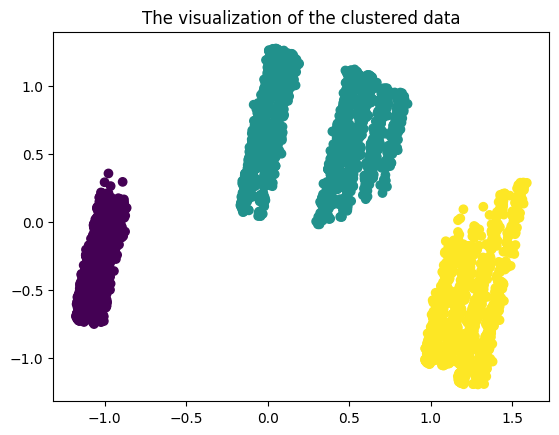

In [ ]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = data_min_max_scaled.copy() # data1 is created, we do not want to change original data as adding the cluster column.
plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.show()

#DBSCAN

In [ ]:
df = pd.read_csv('earthquake_ir.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-14T03:45:58.966Z,32.0636,50.0818,10.0,4.5,mb,49.0,62.0,7.640,0.70,...,2023-04-14T04:10:53.040Z,"50 km WSW of F?rs?n, Iran",earthquake,3.40,1.869,0.081,45.0,reviewed,us,us
1,2023-04-07T23:38:12.647Z,28.1032,56.9952,10.0,4.1,mb,55.0,51.0,3.224,0.49,...,2023-04-16T03:29:38.040Z,"108 km N of M?n?b, Iran",earthquake,4.98,1.882,0.088,35.0,reviewed,us,us
2,2023-04-04T14:53:08.017Z,28.2978,56.9272,10.0,4.0,mb,25.0,144.0,3.401,0.94,...,2023-04-04T16:27:10.040Z,"109 km S of K?h Sef?d, Iran",earthquake,13.03,1.950,0.126,17.0,reviewed,us,us
3,2023-04-03T03:55:02.834Z,28.0114,56.9150,10.0,4.3,mb,50.0,108.0,3.119,0.43,...,2023-04-03T04:15:26.040Z,NaN,earthquake,10.57,1.906,0.086,38.0,reviewed,us,us
4,2023-04-02T07:55:27.919Z,27.1929,52.9741,10.0,4.4,mb,40.0,86.0,3.667,0.56,...,2023-04-02T08:20:38.040Z,NaN,earthquake,8.41,1.898,0.095,32.0,reviewed,us,us


In [ ]:
df_1= df[['latitude', 'longitude']]
df_1.head()

,latitude,longitude
0,32.0636,50.0818
1,28.1032,56.9952
2,28.2978,56.9272
3,28.0114,56.9150
4,27.1929,52.9741


In [ ]:
#Find optimal number of cluster according to silhouette score
def find_optimal_cluster_number_DBSCAN(data, min_samples_lower_bound, min_samples_upper_bound, eps_lower_bound, eps_upper_bound):
  silhouette_average = []
  Min_Samples = range(min_samples_lower_bound, min_samples_upper_bound)
  Epsilon = np.arange(eps_lower_bound, eps_upper_bound, step=0.2)
  for ms in Min_Samples:
    for e in Epsilon:
      dbscan = DBSCAN(eps = e, min_samples= ms)
      clustering= dbscan.fit(data)
      labels = clustering.labels_
      n_clusters = np.unique(dbscan.labels_).size
      silhouette_score = metrics.silhouette_score(data, labels, random_state=42)
      print('silhouette_score for Epsilon=',e ,'Min_Samples=',ms, 'is:', silhouette_score)
      silhouette_average.append([ms, e, silhouette_score])

  silhouette_average = np.array(silhouette_average)
  max = 0
  t = 0
  for i in range(len(silhouette_average)):
    if(silhouette_average[i][2] > max):
      max = silhouette_average[i][2]
      t = silhouette_average[i]
  print('The maximum of silhouette_score is:', max, ' with min_samples:',t[0], 'and Epsilon:',t[1])

In [ ]:
find_optimal_cluster_number_DBSCAN(df_1, min_samples_lower_bound=2, min_samples_upper_bound=11, eps_lower_bound=1, eps_upper_bound=2)

silhouette_score for Epsilon= 1.0 Min_Samples= 2 is: -0.20845926363204986
silhouette_score for Epsilon= 1.2 Min_Samples= 2 is: -0.20845926363204986
silhouette_score for Epsilon= 1.4 Min_Samples= 2 is: -0.20845926363204986
silhouette_score for Epsilon= 1.5999999999999999 Min_Samples= 2 is: -0.2106741527172252
silhouette_score for Epsilon= 1.7999999999999998 Min_Samples= 2 is: -0.19840800623427052
silhouette_score for Epsilon= 1.0 Min_Samples= 3 is: 0.194555232510139
silhouette_score for Epsilon= 1.2 Min_Samples= 3 is: 0.194555232510139
silhouette_score for Epsilon= 1.4 Min_Samples= 3 is: 0.194555232510139
silhouette_score for Epsilon= 1.5999999999999999 Min_Samples= 3 is: 0.24484851692909937
silhouette_score for Epsilon= 1.7999999999999998 Min_Samples= 3 is: 0.18289923169386424
silhouette_score for Epsilon= 1.0 Min_Samples= 4 is: 0.194555232510139
silhouette_score for Epsilon= 1.2 Min_Samples= 4 is: 0.194555232510139
silhouette_score for Epsilon= 1.4 Min_Samples= 4 is: 0.194555232510139

In [ ]:
clustering = DBSCAN(eps=1.6, min_samples=3).fit(df_1)
df_1.loc[:,'Cluster'] = clustering.labels_
labels = clustering.labels_

In [ ]:
df_1

,latitude,longitude,Cluster
0,32.0636,50.0818,0
1,28.1032,56.9952,0
2,28.2978,56.9272,0
3,28.0114,56.9150,0
4,27.1929,52.9741,0
...,...,...,...
2790,26.7370,53.5670,0
2791,27.0620,55.6140,0
2792,26.9850,55.5700,0
2793,35.7000,48.9700,0


In [ ]:
df_1.Cluster.value_counts().to_frame()

,Cluster
0,2789
-1,6


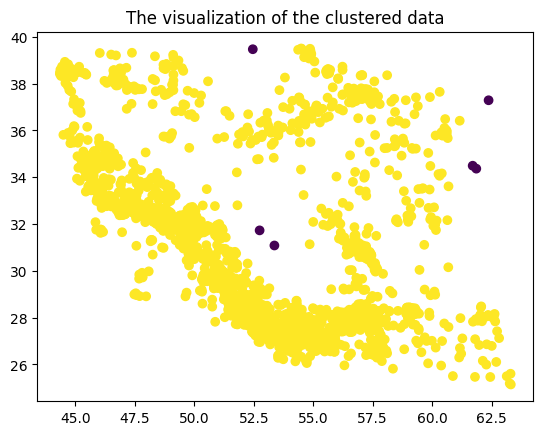

In [ ]:
plt.scatter(df_1['longitude'], df_1['latitude'], c=df_1.Cluster)
plt.title("The visualization of the clustered data")
plt.show()

In [ ]:
#df_2 = df[['latitude', 'longitude', 'depth', 'mag', 'depthError', 'magError']]
df_2 = df[['latitude', 'longitude', 'depth', 'mag']]
df_2

,latitude,longitude,depth,mag
0,32.0636,50.0818,10.0,4.5
1,28.1032,56.9952,10.0,4.1
2,28.2978,56.9272,10.0,4.0
3,28.0114,56.9150,10.0,4.3
4,27.1929,52.9741,10.0,4.4
...,...,...,...,...
2790,26.7370,53.5670,10.0,4.8
2791,27.0620,55.6140,10.0,4.7
2792,26.9850,55.5700,10.0,4.7
2793,35.7000,48.9700,4.0,4.1


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   2795 non-null   float64
 1   longitude  2795 non-null   float64
 2   depth      2795 non-null   float64
 3   mag        2795 non-null   float64
dtypes: float64(4)
memory usage: 87.5 KB


In [ ]:
clustering = DBSCAN(eps=1.6, min_samples=3).fit(df_2)
df_2.loc[:,'Cluster'] = clustering.labels_
labels = clustering.labels_

In [ ]:
df_2.Cluster.value_counts().to_frame()

,Cluster
0,1825
-1,172
2,112
1,108
33,44
...,...
54,3
19,3
44,3
28,3


In [ ]:
# Apply Principle Component Anaylsis for visualizing the data in 2D space.
pca = PCA()
pca_data = pca.fit_transform(df_2)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(df_2.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

pca.explained variance ratio:
  0.646 0.243 0.085 0.026 0.001


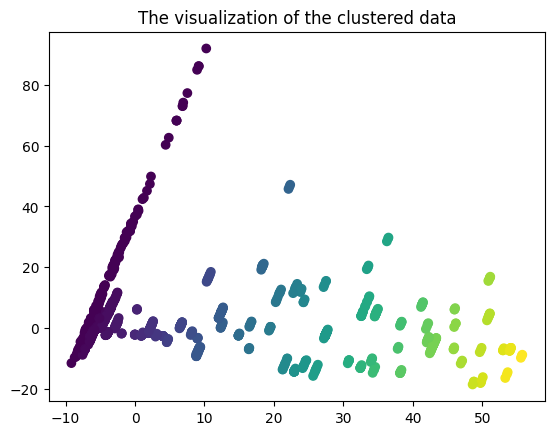

In [ ]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=df_2.Cluster)
plt.title("The visualization of the clustered data")
plt.show()